# Telecom : Exam 2021

### Table of content <br>
* [Import](#Import)<br>
* [Utilities](#Utilities)<br>
* [Read](#Read)<br>
* [Data mining and cleaning](#DMC)<br>
    * [Overview](#Overview)<br>
    * [Data Analyse](#DataAnalyse)<br>
    * [Data Visualisation](#Graphs)<br>
* [Data Modeling](#DataModeling)<br>
    * [Preprocessing](#Prepro)<br>
* [Testing and modeling](#TestsModels)
* [Best Model Choice](#BMC)




### Import <a id ="Import"></a>

In this part all the stuff we need will be centralised

In [218]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

### Utilities <a id="Utilities"></a>

In [219]:
def data_overview(df):
    print("####### Data overview #######")
    print("dataset")
    print("__________")
    print(df)
    print("head")
    print("_____")
    print()
    print(df.head(10))
    print()
    print("Rows - columns :" , df.shape)
    print("Number of features : ",df.shape[1]-1)
    print()
    print("Liste des colonnes : ")
    print("_____________________")
    print()
    print(df.columns)
    print()
    print("Liste des types : ")
    print("_____________________")
    print()
    print(df.info())
    print()
    print("Valeurs manquantes par colonne: ")
    print("________________________________")
    print()
    print(df.isnull().sum())
    print()
    print()
    print("Nombre total de valeurs manquantes: ")
    print("____________________________________")
    print()
    print(df.isnull().sum().values.sum())
    print()
    print("Nbre de valeurs différent es par colonne : ")
    print("__________________________________________")
    print()
    print(df.nunique())

In [220]:
def categorical_plots(df,categorical):
    import matplotlib.pyplot as plt
    i=0
    for i,cat_v in enumerate(categorical):
        plt.figure(figsize=(10,24))
        plt.subplots(1,1)
        df[cat_v].value_counts().plot(kind="bar", title=cat_v)
        plt.ylabel('Frequency')

In [221]:
def features_plots(df,numerical):
    import matplotlib.pyplot as plt
    for i,cv in enumerate(numerical):
        plt.figure(figsize=(10,24))
        plt.subplot(7,2,i+1)
        plt.hist(df[cv],bins=df[cv].nunique())
        plt.title(cv)
        plt.ylabel('frequency')
        plt.show()
    for i,cv in enumerate(numerical):
        plt.figure(figsize=(10,24))
        plt.subplot(7,2,i+3)
        plt.boxplot(df[cv])
        plt.title(cv)
        plt.ylabel('boxplot')
        plt.show()

### Read <a id="Read"></a>

In this part we load the dataset file into the notebook

In [222]:
df_telecoms = pd.read_csv("churn-bigml-80.csv", delimiter=",")

In [223]:
df_telecoms.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data mining and cleaning <a id="DMC"></a>

#### Overview <a id="Overview"></a>

In this part we visualise the dataset in details

In [224]:
data_overview(df_telecoms)

####### Data overview #######
dataset
__________
     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day

After the data visualisation, we see that 2 columns are declared as object but we want them as boolean

#### Data Modeling <a id="DataModeling"></a>

First we create two dataframe, one with the numerical values and one with the ctegorical values

In [225]:
categorical_columns = ["State", "International plan", "Voice mail plan"]
df_numerical = df_telecoms.drop(categorical_columns,axis=1)
df_numerical = df_numerical.drop("Churn",axis=1)
df_categorical = df_telecoms.drop(df_numerical,axis=1)
df_categorical = df_categorical.drop("Churn",axis=1)


Now we have two df, one with numerical values, the other with categorical values

We create here the target list

In [226]:
df_labels = df_telecoms["Churn"]

#### Data Analyse <a id="DataAnalyse"></a>

Here we see the describe content

In [252]:
df_numerical.describe()
# df_categorical.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Data visualisation <a id="Graphs"></a>

<Figure size 720x1728 with 0 Axes>

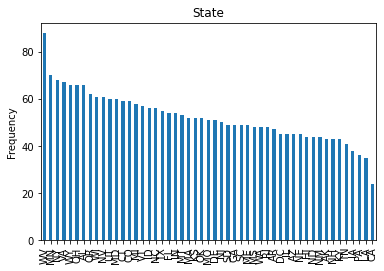

<Figure size 720x1728 with 0 Axes>

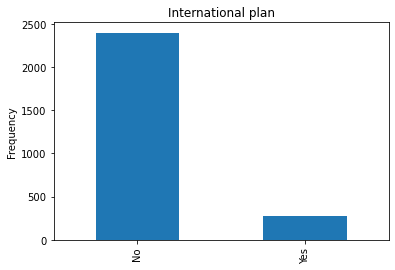

<Figure size 720x1728 with 0 Axes>

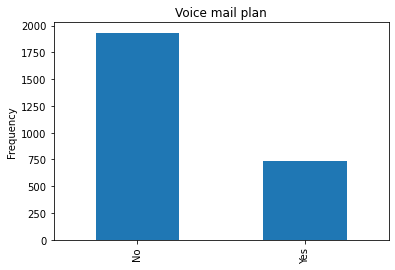

In [228]:
categorical_plots(df_telecoms,df_categorical)

In [229]:
df_numerical.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

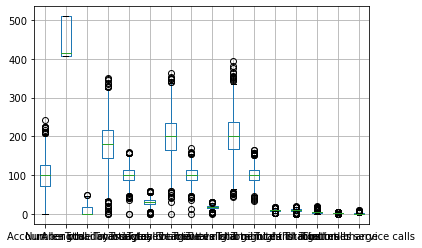

In [230]:
df_numerical_columns = ['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls']
boxplot=df_telecoms.boxplot(column=df_numerical_columns)

## Data modeling <a id="DataModeling"></a>

### Preprocessing <a id="Prepro"></a>

In [231]:
X_categ=df_categorical.to_numpy()
X_numeric=df_numerical.to_numpy()
X=np.hstack((X_categ,X_numeric))
y=df_labels.to_numpy()

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=2)
X_train

array([['KY', 'No', 'Yes', ..., 2.0, 2.16, 6.0],
       ['KS', 'No', 'No', ..., 5.0, 2.65, 1.0],
       ['MI', 'Yes', 'Yes', ..., 3.0, 2.51, 0.0],
       ...,
       ['MA', 'No', 'Yes', ..., 2.0, 2.27, 0.0],
       ['NY', 'Yes', 'No', ..., 3.0, 3.81, 0.0],
       ['NH', 'No', 'No', ..., 4.0, 2.62, 2.0]], dtype=object)

### Encodage <a id="enco"></a>

In [255]:
# print(X_train.shape)
X_train_categorical=X_train[ :,0:3]
X_train_numerical=X_train[ :, 3:19]
# print(X_train_categorical.shape,X_train_numerical.shape)
X_train_categorical.shape

(1866, 3)

In [253]:
# Encodage One Hot
from sklearn.preprocessing import OneHotEncoder
hot_encoder=OneHotEncoder(sparse=False)
X_train_categorical=hot_encoder.fit_transform(X_train_categorical)

print(X_train_categorical.shape)
X_train_categorical

(1866, 110)


array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [242]:
hot_encoder.categories_

[array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [245]:
X_train=np.hstack((X_train_categorical,X_train_numerical))
# print(X_train)

In [246]:
# Encodage label binarizer
from sklearn.preprocessing import LabelBinarizer
binarizer=LabelBinarizer()
Y_train=binarizer.fit_transform(y_train)

### Feature selection

#### Possibilité d'utiliser le Variance Threshold ou SelectKBest (ici Select K Best)

In [247]:
from sklearn.feature_selection import SelectKBest,chi2

In [249]:
#print(chi2(X_train,Y_train))  - n'accepte pas des valeurs standardisées avec Standard Scaler car <0
selector=SelectKBest(chi2,k=8)
X_train=selector.fit_transform(X_train,Y_train)
# X_train

array([[1.0, 0.0, 36.0, ..., 163.2, 172.7, 6.0],
       [1.0, 0.0, 0.0, ..., 102.4, 129.7, 1.0],
       [0.0, 1.0, 26.0, ..., 145.5, 280.7, 0.0],
       ...,
       [1.0, 0.0, 30.0, ..., 236.7, 264.0, 0.0],
       [0.0, 1.0, 0.0, ..., 124.4, 262.0, 0.0],
       [1.0, 0.0, 0.0, ..., 201.3, 214.7, 2.0]], dtype=object)

In [251]:
select=selector.get_support(indices=True)
print(select)
# 14 = fibre optique
# 16 = NO Online security
# 25 = No de tech support
# 34 = contract Month to Month
# 36 = contract Two years
# 43 = tenure
# 44 = Monthly Charges
# 45 = Total Charges
np.shape(X_train)
# X_train

[0 1 2 3 4 5 6 7]


(1866, 8)